In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [3]:
#define number of training iterations
NUM_ITER = 25000
#define learning rate
lr = 0.01

<h2>Define your input data and expected labels</h2>

In [4]:
#define the training input data
x = np.array([[0,0],[1,0],[0,1],[1,1]],np.float32)
#define the target outputs/labels for AND gate
y = np.array([0,1,1,0],np.float32)
#y = np.array([0,1,1,1],np.float32)       (uncomment this line if you are doing OR gate)
y = np.reshape(y,[4,1])

<h2>Reset the graph before you re-train your neural net</h2>

In [5]:
#remember to reset the graph
tf.reset_default_graph()

<h2>Define placeholder and Variables</h2>

In [6]:
#define the placeholder to feed the training data later
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')

<h2>Define training variables:</h2>

In [7]:
#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([2, 2]),name='W1'),
    'Wout': tf.Variable(tf.random_normal([2, 1]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[2]),name='b1'),
    'bout': tf.Variable(tf.zeros(shape=[1]),name='bout')
}

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define the neural network</h2>

In [8]:
#define a neural net model
def neural_net(x, weights, biases):
    layer_1_out = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function</h2>

In [9]:
#predicted labels
logits = neural_net(X, weights, biases)

#define loss
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#Initialize the variables
init = tf.global_variables_initializer()

<h2>Execute training</h2>

In [10]:
loss_list = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run([loss, train_op], feed_dict = {X:x,Y:y})
        
        if i % 1000 == 0:
            L = sess.run(loss, feed_dict={X:x,Y:y})
            loss_list.append(L)
            print("Epoch = " + str(i) + ", " + "Loss = " + str(L))
            #print(sess.run(tf.abs(tf.reduce_sum(y - tf.sigmoid(neural_net(x, weights, biases))))))
    
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W1 = np.squeeze(sess.run(weights['W1']))
    Wout = np.squeeze(sess.run(weights['Wout']))
    b1 = np.squeeze(sess.run(biases['b1']))
    bout = np.squeeze(sess.run(biases['bout']))
    
    final_output = sess.run(tf.sigmoid(neural_net(x, weights, biases)))

Epoch = 0, Loss = 3.1945767
Epoch = 1000, Loss = 2.7286813
Epoch = 2000, Loss = 2.5934358
Epoch = 3000, Loss = 2.351653
Epoch = 4000, Loss = 1.9635003
Epoch = 5000, Loss = 1.3430523
Epoch = 6000, Loss = 0.8029243
Epoch = 7000, Loss = 0.51412576
Epoch = 8000, Loss = 0.3633487
Epoch = 9000, Loss = 0.2762159
Epoch = 10000, Loss = 0.2208903
Epoch = 11000, Loss = 0.18313451
Epoch = 12000, Loss = 0.15592778
Epoch = 13000, Loss = 0.1354858
Epoch = 14000, Loss = 0.11961371
Epoch = 15000, Loss = 0.10696082
Epoch = 16000, Loss = 0.09665454
Epoch = 17000, Loss = 0.088107765
Epoch = 18000, Loss = 0.08091176
Epoch = 19000, Loss = 0.074774556
Epoch = 20000, Loss = 0.0694815
Epoch = 21000, Loss = 0.06487203
Epoch = 22000, Loss = 0.060823213
Epoch = 23000, Loss = 0.05723981
Epoch = 24000, Loss = 0.054047067


<h3>Output for each input state in final step</h3>

In [11]:
x, final_output, y

(array([[0., 0.],
        [1., 0.],
        [0., 1.],
        [1., 1.]], dtype=float32), array([[0.01236337],
        [0.98308265],
        [0.9889431 ],
        [0.01051101]], dtype=float32), array([[0.],
        [1.],
        [1.],
        [0.]], dtype=float32))

<h2>Plot</h2>

<h3>Plotting of the Loss</h3>

Text(0, 0.5, 'Loss')

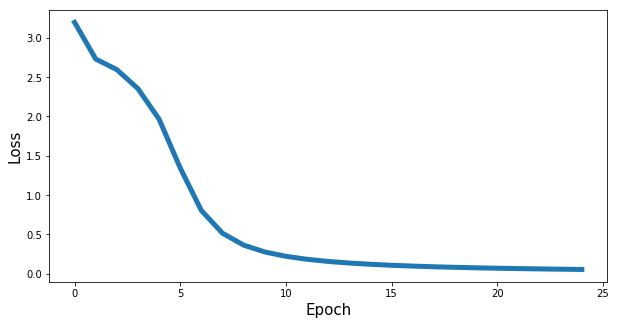

In [12]:
fig = plt.figure(figsize=(10,5))
plt.plot(loss_list, linewidth = 5)
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)

<h3>Plotting of the Decision Boundary</h3>

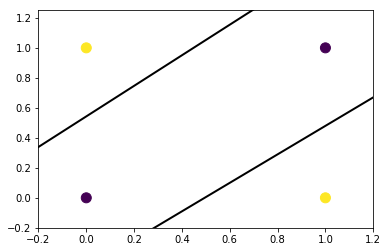

In [13]:
#plot out the decision line determined by learned weight and bias
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y1 = 1 / W1[1, 0] * (-W1[0, 0] * plot_x - b1[0])
plot_y2 = 1 / W1[1, 1] * (-W1[0, 1] * plot_x - b1[1])

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y1, color='k', linewidth=2)
plt.plot(plot_x, plot_y2, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()